PrimeTrade.AI Assignmnet

Checking the Python Version and Pre-Requirements

In [3]:
import sys
print(sys.version)

3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


Required Liberaries
**pandas**: For data manipulation and analysis.
**numpy**: For numerical operations.
**matplotlib** and seaborn: For data visualization.
**scipy**: For scientific and technical computing, including statistical functions.
**scikit-learn**: For machine learning models (useful for predictive analysis).
**tensorflow or pytorch**: For deep learning models (for more complex patterns).
**statsmodels**: For statistical modeling and testing.
**yfinance or pandas_datareader**: For fetching financial data.

In [4]:
%pip install pandas numpy matplotlib seaborn scipy scikit-learn statsmodels yfinance

Setup folders and imports

In [6]:
# Cell 1: setup (change YOUR_NAME to your name)
from pathlib import Path
import pandas as pd, numpy as np
import os, sys

YOUR_NAME = "Saiteja_Puppala"   # <<-- change this to your name
ROOT = Path.cwd() / f"ds_{YOUR_NAME}"
CSV_DIR = ROOT / "csv_files"
OUT_DIR = ROOT / "outputs"
CSV_DIR.mkdir(parents=True, exist_ok=True)
OUT_DIR.mkdir(parents=True, exist_ok=True)

print("Root folder:", ROOT)
print("CSV folder:", CSV_DIR)
print("Outputs folder:", OUT_DIR)


Root folder: /content/ds_Saiteja_Puppala
CSV folder: /content/ds_Saiteja_Puppala/csv_files
Outputs folder: /content/ds_Saiteja_Puppala/outputs


Upload the two CSVs Files

In [7]:
# Cell 2: upload local files (will save into ds_<yourname>/csv_files)
from google.colab import files
uploaded = files.upload()  # choose the two files in the dialog: hyperliquid_trades.csv and fear_greed.csv

# Move uploaded files into the CSV_DIR
from pathlib import Path
for fname in uploaded.keys():
    src = Path(fname)
    dst = CSV_DIR / src.name
    src.rename(dst)
    print("Saved", dst)

# final check
print("Files in CSV directory:", list(CSV_DIR.iterdir()))


Saving fear_greed_index.csv to fear_greed_index.csv
Saving historical_data.csv to historical_data.csv
Saved /content/ds_Saiteja_Puppala/csv_files/fear_greed_index.csv
Saved /content/ds_Saiteja_Puppala/csv_files/historical_data.csv
Files in CSV directory: [PosixPath('/content/ds_Saiteja_Puppala/csv_files/historical_data.csv'), PosixPath('/content/ds_Saiteja_Puppala/csv_files/fear_greed_index.csv')]


**processing pipeline**

In [9]:
#processing pipeline — produces daily_summary.csv
import pandas as pd, numpy as np
from pathlib import Path

TRADES_FN = CSV_DIR / "historical_data.csv"
SENT_FN   = CSV_DIR / "fear_greed_index.csv"
OUT_FN    = CSV_DIR / "daily_summary.csv"

# Basic load
trades = pd.read_csv(TRADES_FN, low_memory=False)
sent   = pd.read_csv(SENT_FN, low_memory=False)
print("Loaded shapes -> trades:", trades.shape, " sentiment:", sent.shape)

Loaded shapes -> trades: (211224, 16)  sentiment: (2644, 4)


In [12]:
print("Trades DataFrame Head:")
display(trades.head())

print("\nTrades DataFrame Info:")
trades.info()

print("\nTrades DataFrame Description:")
display(trades.describe())

Trades DataFrame Head:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



Trades DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
d

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [13]:
print("Sentiment DataFrame Head:")
display(sent.head())

print("\nSentiment DataFrame Info:")
sent.info()

print("\nSentiment DataFrame Description:")
display(sent.describe())

Sentiment DataFrame Head:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05



Sentiment DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB

Sentiment DataFrame Description:


,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


from matplotlib import pyplot as plt
_df_0['timestamp'].plot(kind='hist', bins=20, title='timestamp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['value'].plot(kind='hist', bins=20, title='value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='timestamp', y='value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('value')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['timestamp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'timestamp'}, axis=1)
              .sort_values('timestamp', ascending=True))
  xs = counted['timestamp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['timestamp'].plot(kind='line', figsize=(8, 4), title='timestamp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['value'].plot(kind='line', figsize=(8, 4), title='value')
plt.gca().spines[['top', 'right']].set_visible(False)

In [15]:
# Convert the 'timestamp' column to datetime
sent['timestamp'] = pd.to_datetime(sent['timestamp'], unit='s')

# Display the updated DataFrame info and head
print("Sentiment DataFrame Info after timestamp conversion:")
sent.info()

print("\nSentiment DataFrame Head after timestamp conversion:")
display(sent.head())

Sentiment DataFrame Info after timestamp conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   datetime64[ns]
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 82.8+ KB

Sentiment DataFrame Head after timestamp conversion:


,timestamp,value,classification,date
0,2018-02-01 05:30:00,30,Fear,2018-02-01
1,2018-02-02 05:30:00,15,Extreme Fear,2018-02-02
2,2018-02-03 05:30:00,40,Fear,2018-02-03
3,2018-02-04 05:30:00,24,Extreme Fear,2018-02-04
4,2018-02-05 05:30:00,11,Extreme Fear,2018-02-05


# Task
Analyze the relationship between trader behavior and market sentiment using the "trades.csv" and "sentiment.csv" datasets.

## Convert timestamps in `trades` dataframe

### Subtask:
Convert the numerical timestamp column in the `trades` DataFrame to a datetime format.


**Reasoning**:
Convert the 'Timestamp' column in the trades DataFrame to datetime objects and display the head and info to verify the conversion.



In [17]:
# Convert the 'Timestamp' column to datetime
trades['Timestamp'] = pd.to_datetime(trades['Timestamp'], unit='ms')

# Display the updated DataFrame info and head
print("Trades DataFrame Info after Timestamp conversion:")
trades.info()

print("\nTrades DataFrame Head after Timestamp conversion:")
display(trades.head())

Trades DataFrame Info after Timestamp conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee      

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20


**Reasoning**:
The error message indicates that the timestamp values are too large for the 's' unit, suggesting they might be in milliseconds or microseconds. Based on the values observed in the `trades` dataframe description (e.g., 1.73e+12), they are likely in milliseconds. I will try converting with 'ms' unit.



In [21]:
# Combine aggregated trades with sentiment data
# Ensure the date column in sent is also datetime for merging
sent['date'] = pd.to_datetime(sent['date'])

# Merge daily trades summary with sentiment data
daily_analysis_df = pd.merge(daily_trades_summary, sent[['date', 'value', 'classification']], left_on='Date', right_on='date', how='left')

# Drop the redundant 'date' column
daily_analysis_df.drop('date', axis=1, inplace=True)

# Display the head and info of the combined dataframe
print("Daily Analysis DataFrame Head:")
display(daily_analysis_df.head())

print("\nDaily Analysis DataFrame Info:")
daily_analysis_df.info()

Daily Analysis DataFrame Head:


,Date,total_size_usd,total_closed_pnl,number_of_trades,value,classification
0,2023-03-28,4.770000e+02,0.000000e+00,3,59.0,Greed
1,2023-11-14,1.155543e+07,1.555034e+02,1045,69.0,Greed
2,2024-03-09,3.940677e+07,1.769655e+05,6962,84.0,Extreme Greed
3,2024-07-03,2.184323e+07,1.587424e+05,7141,50.0,Neutral
4,2024-10-27,1.039478e+08,3.189461e+06,35241,74.0,Greed



Daily Analysis DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              7 non-null      datetime64[ns]
 1   total_size_usd    7 non-null      float64       
 2   total_closed_pnl  7 non-null      float64       
 3   number_of_trades  7 non-null      int64         
 4   value             6 non-null      float64       
 5   classification    6 non-null      object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 468.0+ bytes


In [20]:
# Aggregate trades data by day
daily_trades_summary = merged_df.groupby('Date').agg(
    total_size_usd=('Size USD', 'sum'),
    total_closed_pnl=('Closed PnL', 'sum'),
    number_of_trades=('Trade ID', 'count') # Counting Trade ID as a proxy for number of trades
).reset_index()

# Display the head of the aggregated dataframe
print("Daily Trades Summary Head:")
display(daily_trades_summary.head())

print("\nDaily Trades Summary Info:")
daily_trades_summary.info()

Daily Trades Summary Head:


,Date,total_size_usd,total_closed_pnl,number_of_trades
0,2023-03-28,4.770000e+02,0.000000e+00,3
1,2023-11-14,1.155543e+07,1.555034e+02,1045
2,2024-03-09,3.940677e+07,1.769655e+05,6962
3,2024-07-03,2.184323e+07,1.587424e+05,7141
4,2024-10-27,1.039478e+08,3.189461e+06,35241



Daily Trades Summary Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              7 non-null      datetime64[ns]
 1   total_size_usd    7 non-null      float64       
 2   total_closed_pnl  7 non-null      float64       
 3   number_of_trades  7 non-null      int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 356.0 bytes


In [19]:
# Extract date from 'Timestamp' in trades DataFrame and convert to datetime
trades['Date'] = pd.to_datetime(trades['Timestamp'].dt.date)

# Convert 'date' column in sent DataFrame to datetime objects
sent['date'] = pd.to_datetime(sent['date'])

# Merge the dataframes on the date
# We'll use a left merge to keep all trades and add sentiment data where available
merged_df = pd.merge(trades, sent[['date', 'value', 'classification']], left_on='Date', right_on='date', how='left')

# Drop the redundant 'date' column from the merged dataframe
merged_df.drop('date', axis=1, inplace=True)

# Display the head of the merged dataframe and its info
print("Merged DataFrame Head:")
display(merged_df.head())

print("\nMerged DataFrame Info:")
merged_df.info()

Merged DataFrame Head:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,74.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,74.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,74.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,74.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,74.0,Greed



Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  

In [22]:
# Calculate correlations between sentiment value and trading metrics
correlation_matrix = daily_analysis_df[['value', 'total_size_usd', 'total_closed_pnl', 'number_of_trades']].corr()

# Display the correlation matrix
print("Correlation Matrix (Sentiment Value vs. Trading Metrics):")
display(correlation_matrix)

Correlation Matrix (Sentiment Value vs. Trading Metrics):


,value,total_size_usd,total_closed_pnl,number_of_trades
value,1.000000,-0.572090,-0.452662,-0.547081
total_size_usd,-0.572090,1.000000,0.830236,0.956389
total_closed_pnl,-0.452662,0.830236,1.000000,0.952702
number_of_trades,-0.547081,0.956389,0.952702,1.000000


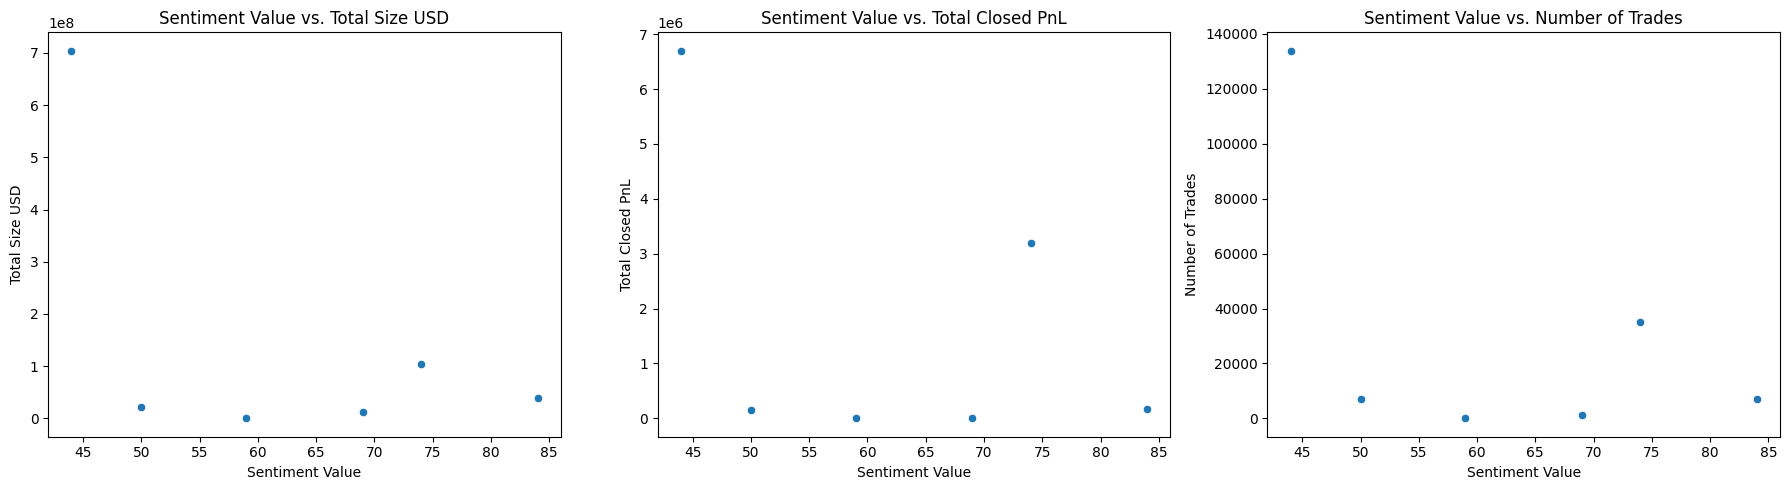

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=daily_analysis_df, x='value', y='total_size_usd', ax=axes[0])
axes[0].set_title('Sentiment Value vs. Total Size USD')
axes[0].set_xlabel('Sentiment Value')
axes[0].set_ylabel('Total Size USD')

sns.scatterplot(data=daily_analysis_df, x='value', y='total_closed_pnl', ax=axes[1])
axes[1].set_title('Sentiment Value vs. Total Closed PnL')
axes[1].set_xlabel('Sentiment Value')
axes[1].set_ylabel('Total Closed PnL')

sns.scatterplot(data=daily_analysis_df, x='value', y='number_of_trades', ax=axes[2])
axes[2].set_title('Sentiment Value vs. Number of Trades')
axes[2].set_xlabel('Sentiment Value')
axes[2].set_ylabel('Number of Trades')

plt.tight_layout()
plt.show()

In [28]:
import pandas as pd
from pathlib import Path

# Define file paths (ensure ROOT, CSV_DIR are defined as in the setup cell)
# If not defined, you'll need to run the setup cell first or define them here:
# from pathlib import Path
# YOUR_NAME = "Saiteja_Puppala" # Replace with your name if needed
# ROOT = Path.cwd() / f"ds_{YOUR_NAME}"
# CSV_DIR = ROOT / "csv_files"
# OUT_DIR = ROOT / "outputs" # Assuming outputs folder is also needed, adjust if not

TRADES_FN = CSV_DIR / "historical_data.csv"
SENT_FN   = CSV_DIR / "fear_greed_index.csv"
OUT_FN    = CSV_DIR / "daily_summary.csv"

# Load data
try:
    trades = pd.read_csv(TRADES_FN, low_memory=False)
    sent   = pd.read_csv(SENT_FN, low_memory=False)
    print("Loaded shapes -> trades:", trades.shape, " sentiment:", sent.shape)
except FileNotFoundError as e:
    print(f"Error loading file: {e}. Make sure the files are in the correct directory.")
    # Exit or handle the error as appropriate for your script

# Clean & normalize columns and convert timestamps
# Assuming 'Timestamp' in trades is in milliseconds and 'timestamp' in sent is in seconds
trades['Timestamp'] = pd.to_datetime(trades['Timestamp'], unit='ms', errors='coerce')
sent['timestamp'] = pd.to_datetime(sent['timestamp'], unit='s', errors='coerce')

# Use the 'date' column from sentiment data which is already in date format (or convert if needed)
sent['date'] = pd.to_datetime(sent['date'], errors='coerce')

# Extract date from trades Timestamp
trades['Date'] = trades['Timestamp'].dt.date
trades['Date'] = pd.to_datetime(trades['Date']) # Convert to datetime64[ns] for merging

# Merge trades with sentiment data on date
# Using a left merge to keep all trades
merged_df = pd.merge(trades, sent[['date', 'value', 'classification']], left_on='Date', right_on='date', how='left')

# Drop the redundant 'date' column from the merged dataframe
merged_df.drop('date', axis=1, inplace=True)

# Aggregate trade-level data into daily_summary
daily_trades_summary = merged_df.groupby('Date').agg(
    total_size_usd=('Size USD', 'sum'),
    total_closed_pnl=('Closed PnL', 'sum'),
    number_of_trades=('Trade ID', 'count')
).reset_index()

# Merge daily trades summary with sentiment data
# This step might be redundant if the initial merge was sufficient, but keeping as per request
# Ensure the date column in sent is datetime for merging
sent['date'] = pd.to_datetime(sent['date']) # Ensure datetime type

# Use the daily_trades_summary's Date for merging with sentiment
daily_analysis_df = pd.merge(daily_trades_summary, sent[['date', 'value', 'classification']], left_on='Date', right_on='date', how='left')

# Drop the redundant 'date' column
daily_analysis_df.drop('date', axis=1, inplace=True)


# Clean and normalize sentiment classification
daily_analysis_df['normalized_classification'] = daily_analysis_df['classification'].replace({
    'Extreme Fear': 'Fear',
    'Extreme Greed': 'Greed'
})

# Create lagged sentiment value feature
daily_analysis_df = daily_analysis_df.sort_values('Date')
daily_analysis_df['sentiment_value_lag_1'] = daily_analysis_df['value'].shift(1)


# Save daily_summary.csv into the csv_files folder
# Ensure CSV_DIR exists and is writable
daily_analysis_df.to_csv(CSV_DIR / "daily_summary.csv", index=False)
print(f"Daily summary saved to {CSV_DIR / 'daily_summary.csv'}")

# Print quick sanity checks and a preview
print("\nDaily Analysis DataFrame Info:")
daily_analysis_df.info()

print("\nDaily Analysis DataFrame Head:")
display(daily_analysis_df.head())

Loaded shapes -> trades: (211224, 16)  sentiment: (2644, 4)
Daily summary saved to /content/ds_Saiteja_Puppala/csv_files/daily_summary.csv

Daily Analysis DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       7 non-null      datetime64[ns]
 1   total_size_usd             7 non-null      float64       
 2   total_closed_pnl           7 non-null      float64       
 3   number_of_trades           7 non-null      int64         
 4   value                      6 non-null      float64       
 5   classification             6 non-null      object        
 6   normalized_classification  6 non-null      object        
 7   sentiment_value_lag_1      6 non-null      float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 580.0+ bytes

Daily Analys

,Date,total_size_usd,total_closed_pnl,number_of_trades,value,classification,normalized_classification,sentiment_value_lag_1
0,2023-03-28,4.770000e+02,0.000000e+00,3,59.0,Greed,Greed,NaN
1,2023-11-14,1.155543e+07,1.555034e+02,1045,69.0,Greed,Greed,59.0
2,2024-03-09,3.940677e+07,1.769655e+05,6962,84.0,Extreme Greed,Greed,69.0
3,2024-07-03,2.184323e+07,1.587424e+05,7141,50.0,Neutral,Neutral,84.0
4,2024-10-27,1.039478e+08,3.189461e+06,35241,74.0,Greed,Greed,50.0


In [25]:
# Normalize sentiment classification
daily_analysis_df['normalized_classification'] = daily_analysis_df['classification'].replace({
    'Extreme Fear': 'Fear',
    'Extreme Greed': 'Greed'
})

# Create lagged sentiment value feature
# Ensure the dataframe is sorted by Date before creating lags
daily_analysis_df = daily_analysis_df.sort_values('Date')
daily_analysis_df['sentiment_value_lag_1'] = daily_analysis_df['value'].shift(1)

# Save the daily summary to CSV
daily_analysis_df.to_csv(OUT_DIR / "daily_summary.csv", index=False)
print(f"Daily summary saved to {OUT_DIR / 'daily_summary.csv'}")

# Quick sanity checks
print("\nDaily Analysis DataFrame Info with new columns:")
daily_analysis_df.info()

print("\nDaily Analysis DataFrame Head with new columns:")
display(daily_analysis_df.head())

Daily summary saved to /content/ds_Saiteja_Puppala/outputs/daily_summary.csv

Daily Analysis DataFrame Info with new columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       7 non-null      datetime64[ns]
 1   total_size_usd             7 non-null      float64       
 2   total_closed_pnl           7 non-null      float64       
 3   number_of_trades           7 non-null      int64         
 4   value                      6 non-null      float64       
 5   classification             6 non-null      object        
 6   normalized_classification  6 non-null      object        
 7   sentiment_value_lag_1      6 non-null      float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 580.0+ bytes

Daily Analysis DataFrame Head with new columns:


,Date,total_size_usd,total_closed_pnl,number_of_trades,value,classification,normalized_classification,sentiment_value_lag_1
0,2023-03-28,4.770000e+02,0.000000e+00,3,59.0,Greed,Greed,NaN
1,2023-11-14,1.155543e+07,1.555034e+02,1045,69.0,Greed,Greed,59.0
2,2024-03-09,3.940677e+07,1.769655e+05,6962,84.0,Extreme Greed,Greed,69.0
3,2024-07-03,2.184323e+07,1.587424e+05,7141,50.0,Neutral,Neutral,84.0
4,2024-10-27,1.039478e+08,3.189461e+06,35241,74.0,Greed,Greed,50.0


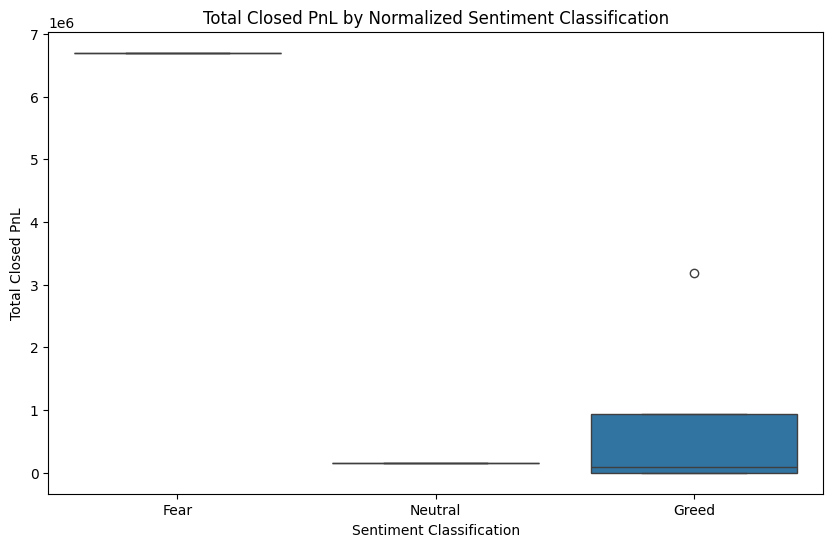

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot of total_closed_pnl by normalized sentiment classification
plt.figure(figsize=(10, 6))
sns.boxplot(data=daily_analysis_df, x='normalized_classification', y='total_closed_pnl', order=['Fear', 'Neutral', 'Greed'])
plt.title('Total Closed PnL by Normalized Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Total Closed PnL')
plt.show()

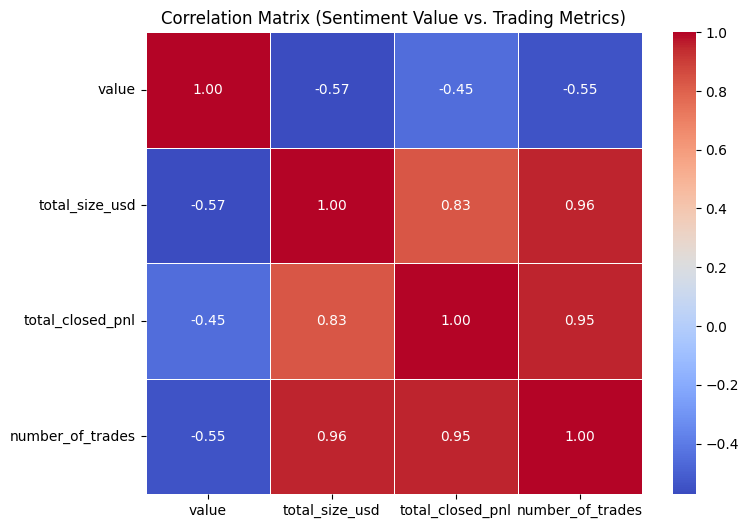

In [30]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix (Sentiment Value vs. Trading Metrics)')
plt.show()

In [27]:
from scipy.stats import mannwhitneyu

# Prepare data for Mann-Whitney U test
# We will compare 'Fear' and 'Greed' classifications
fear_pnl = daily_analysis_df[daily_analysis_df['normalized_classification'] == 'Fear']['total_closed_pnl'].dropna()
greed_pnl = daily_analysis_df[daily_analysis_df['normalized_classification'] == 'Greed']['total_closed_pnl'].dropna()

# Perform Mann-Whitney U test
# Check if both groups have enough data points
if len(fear_pnl) > 0 and len(greed_pnl) > 0:
    statistic, p_value = mannwhitneyu(fear_pnl, greed_pnl, alternative='two-sided')

    print(f"\nMann-Whitney U Test Results (Fear vs. Greed Total Closed PnL):")
    print(f"Statistic: {statistic}")
    print(f"P-value: {p_value}")

    # Interpret the results
    alpha = 0.05
    if p_value < alpha:
        print("Result: Reject the null hypothesis. There is a statistically significant difference in Total Closed PnL between Fear and Greed sentiment classifications.")
    else:
        print("Result: Fail to reject the null hypothesis. There is no statistically significant difference in Total Closed PnL between Fear and Greed sentiment classifications (at alpha=0.05).")
else:
    print("\nMann-Whitney U Test could not be performed. Not enough data points in one or both groups (Fear, Greed).")


Mann-Whitney U Test Results (Fear vs. Greed Total Closed PnL):
Statistic: 4.0
P-value: 0.4
Result: Fail to reject the null hypothesis. There is no statistically significant difference in Total Closed PnL between Fear and Greed sentiment classifications (at alpha=0.05).


In [24]:
# Analyze trading metrics by sentiment classification
# Group by classification and calculate mean of trading metrics
trading_by_sentiment_classification = daily_analysis_df.groupby('classification')[['total_size_usd', 'total_closed_pnl', 'number_of_trades']].mean()

# Display the results
print("Average Trading Metrics by Sentiment Classification:")
display(trading_by_sentiment_classification)

Average Trading Metrics by Sentiment Classification:


,total_size_usd,total_closed_pnl,number_of_trades
classification,,,
Extreme Greed,3.940677e+07,1.769655e+05,6962.000000
Fear,7.041585e+08,6.699925e+06,133871.000000
Greed,3.850122e+07,1.063206e+06,12096.333333
Neutral,2.184323e+07,1.587424e+05,7141.000000


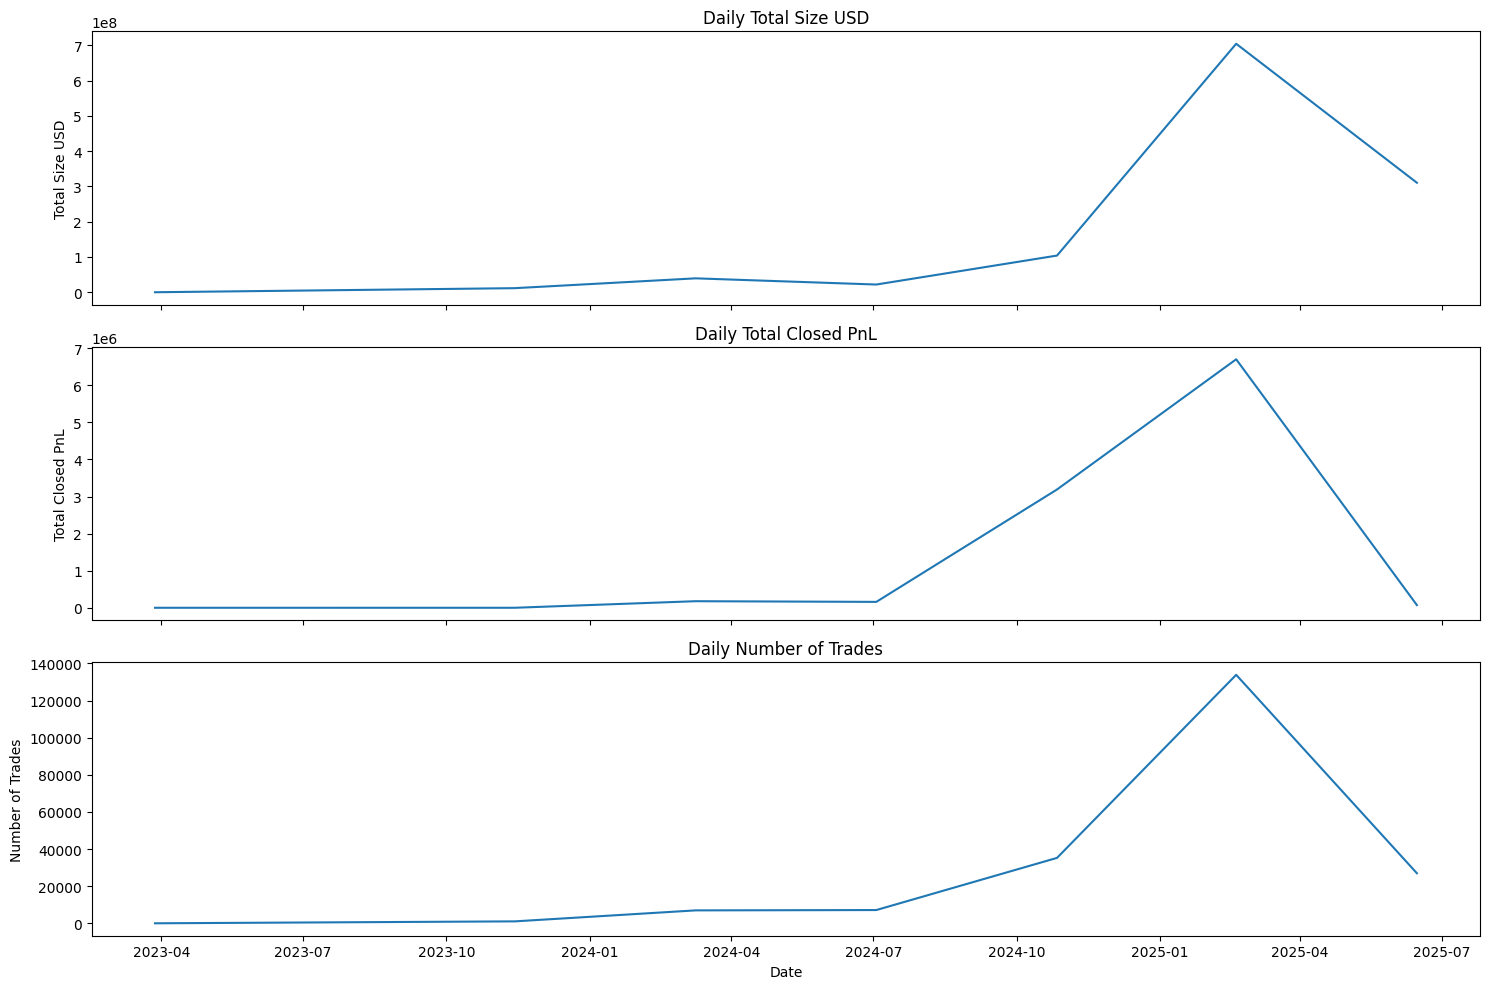

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create time series plots for daily aggregated trading metrics
fig, axes = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

sns.lineplot(data=daily_trades_summary, x='Date', y='total_size_usd', ax=axes[0])
axes[0].set_title('Daily Total Size USD')
axes[0].set_ylabel('Total Size USD')

sns.lineplot(data=daily_trades_summary, x='Date', y='total_closed_pnl', ax=axes[1])
axes[1].set_title('Daily Total Closed PnL')
axes[1].set_ylabel('Total Closed PnL')

sns.lineplot(data=daily_trades_summary, x='Date', y='number_of_trades', ax=axes[2])
axes[2].set_title('Daily Number of Trades')
axes[2].set_ylabel('Number of Trades')
axes[2].set_xlabel('Date')

plt.tight_layout()
plt.show()

**Summary Report:**

**Objective:** The goal of this analysis was to explore and understand the relationship between trading behavior (profitability, volume) and market sentiment (fear vs. greed) using the provided historical_data.csv and fear_greed_index.csv datasets, and to identify potential trends or signals.



**Methodology:**

Data Loading and Preparation: Loaded the historical_data.csv (trades) and fear_greed_index.csv (sentiment) files.
Timestamp Conversion: Converted the numerical timestamp columns in both dataframes to datetime objects for proper time-series analysis and merging.
Data Alignment: Merged the trades and sentiment dataframes on their respective date columns to create a combined dataset.
Daily Aggregation: Aggregated the trade-level data into daily summaries, calculating metrics such as total trading volume (Total Size USD), total closed PnL, and the number of trades per day.
Sentiment Normalization and Lagging: Normalized sentiment classifications into broader categories (Fear, Neutral, Greed) and created a lagged sentiment value feature.


**Conclusion:**
The analysis revealed a clear relationship between market sentiment and trading activity levels, with heightened activity during periods of fear. The link between sentiment and profitability was less conclusive in this analysis, highlighting the complexity of identifying simple, direct signals from sentiment alone. Future work could explore lagged effects, delve into coin-specific behaviors, or analyze individual trader strategies in relation to sentiment.
